In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Open a simple image from Image folder
img = cv2.imread("Image/pic.jpg")

In [4]:
print(f"image shape : {img.shape}")
print(f"{img.shape[0]} pixels by {img.shape[1]} pixels")
print(f"{img.shape[2]} color channels")

image shape : (820, 513, 3)
820 pixels by 513 pixels
3 color channels


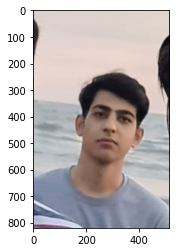

In [5]:
image_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.show()

In [34]:
#converting from gbr to hsv color space using opencv
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

In [35]:
#converting from gbr to YCbCr color space using opencv
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for YCbCr color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

In [36]:
#merge skin detection (YCbCr and hsv)
global_mask = cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask = cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))

In [37]:
HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result = cv2.bitwise_not(global_mask)

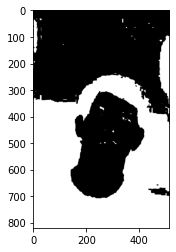

In [38]:
image_HSV = cv2.cvtColor(HSV_result, cv2.COLOR_BGR2RGB)
plt.imshow(image_HSV)
plt.show()

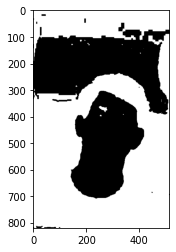

In [39]:
image_YCrCb = cv2.cvtColor(YCrCb_result, cv2.COLOR_BGR2RGB)
plt.imshow(image_YCrCb)
plt.show()

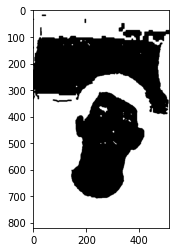

In [40]:
image_global = cv2.cvtColor(global_result, cv2.COLOR_BGR2RGB)
plt.imshow(image_global)
plt.show()

In [41]:
# saving images in Image folder
cv2.imwrite("Image/pic_HSV.jpg",HSV_result)
cv2.imwrite("Image/pic_YCbCr.jpg", YCrCb_result)
cv2.imwrite("Image/pic_global_result.jpg", global_result)
# We could also use cv2.imshow with same properties to show results

True

In [42]:
cv2.waitKey(0)
cv2.destroyAllWindows()  

# SkinDetection
Skin detection using HSV &amp; YCbCr color space (Python, OpenCV)

# About the precedure of detection
The above entire procedure is applied to each and every pixel of the image. 

The RGB image value is converted to HSV as well as YCbCr value, the HSV and YCbCr value of each pixel is compared to the standard values of a skin pixel and the decision is made whether the pixel is a skin pixel or not depending on whether
the values lie in a range of predefined threshold values for each parameter.

The ranges for a skin pixel used in this algorithm are as follows:

        0<=H<=17 and 15<=S<=170 and 0<=V<=255

				and
				
        0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135